# Ejercicio 1
Implementa el método de Euler en Julia. Debe ser de la forma metodo_euler(f,x0,t0,tf,h). No olvide que no debe de utilizar SymPy de ningún modo en este ejercicio. Naturalmente la función f es de dos variables. El output de la función debe ser return listt,listx. Otra forma quizá más inteligente de implementarlo es definir desde antes listt, y que los inputs del método sean de la forma: metodo_euler(f,x0,listt), naturalmente en listt va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

Pruebe su nuevo método resolviendo la ecuación: $$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$ con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

El método de Euler es un procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias (EDO) a partir de un valor inicial dado.

Obs: Las funciones metodo_euler(f,list,x0,h) y function lista_t(x0,h) se utilizaron para cada condición inicial de todos los ejercicios y lo que fue cambiando en cada caso fueron los valores de f y de h.

In [1]:
#Este programa implementa el método de Euler para resolver la EDO dx/dt=-ax con un valor incial dado.
function metodo_euler(f,list,x0,h)
     x = x0 #Condición incial de x
     listx=[] #Se da la lista para los puntos de x
     push!(listx,x) #Arregla los valores en un vector
     for i in 2:length(list) #Se itera el proceso hasta el valor del tamaño de list
        t = x+i*h # Los valores de t dependen del valor incial de x y de h(tamaño de los subintervalos)
        x = x + f(x,t)*h #Son los valores de la curva aproximada por la regla recursiva del Metodo de Euler
        push!(listx,x) 
     end
     return listx #Devuelve la lista con los valores de x
end

metodo_euler (generic function with 1 method)

In [2]:
f(x,t)=-2.5*x[2] #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [3]:
#En esta parte de la rutina se puede calcular los valores de t para cada h
function lista_t(x0,h)
    x=x0 #Valor incial de x
     listt=[] #Da la lista de los elementos de t
     for i in 0:10 #Se hacen 10 iteraciones
        t =x+i*h #Fórmula para obtener t 
        push!(listt,t) #Acomoda cada elemento en un vector
     end
     return listt #Devuelve los valores de t
end

lista_t (generic function with 1 method)

In [4]:
#Cada lista corresponde a un valor dado de h
list1=lista_t(0,1.0);
list2=lista_t(0,0.5);
list3=lista_t(0,0.2);
list4=lista_t(0,0.01);

In [5]:
#Con vec_# se obtienen la soluciones del sistema para la condición incial x(0)=1 y para diferentes valores de h
vec1=metodo_euler(f,list1,[0,1],1.0);
vec2=metodo_euler(f,list2,[0,1],0.5);
vec3=metodo_euler(f,list3,[0,1],0.2);
vec4=metodo_euler(f,list4,[0,1],0.01);

In [6]:
#De la misma forma que el paso anterior pero ahora para la otra condicón incial x(0)=2 y con valores distintos de h
vec5=metodo_euler(f,list1,[0,2],1.0);
vec6=metodo_euler(f,list2,[0,2],0.5);
vec7=metodo_euler(f,list3,[0,2],0.2);
vec8=metodo_euler(f,list4,[0,2],0.01);

In [7]:
#Con listx_3 se guardan las entradas de los vectores anteriores y contienen los elementos de los valores de la solución de x para la conción incial x(0)=1
listx1=map(x->x[2],vec1);
listx2=map(x->x[2],vec2);
listx3=map(x->x[2],vec3);
listx4=map(x->x[2],vec4);

In [8]:
#Análogamente al paso anterior pero con la condición incial x(0)=2
listx5=map(x->x[2],vec5);
listx6=map(x->x[2],vec6);
listx7=map(x->x[2],vec7);
listx8=map(x->x[2],vec8);

En esta parte se calcularon las soluciones exactas correspondientes a cada condicón incial.

In [9]:
t=linspace(0,10) #Se da un intervalo para t

0.0:0.20408163265306123:10.0

In [10]:
X1=exp.(-2.5*t); #Solución exacta con valor incial en x(0)=1

In [11]:
X2=2*exp.(-2.5*t); #Solución exacta con valor incial en x(0)=2

In [12]:
using PyPlot

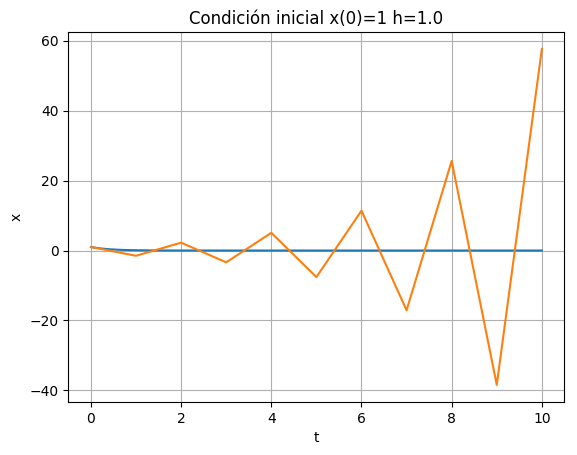

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febf91a2e90>

In [13]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=1.0")
grid("on")
plot(t,X1) #Gráfica azul corresponde a la solución exacta
plot(list1,listx1) #Gráfica naranja corresponde a la solución aproximada en h=1.0

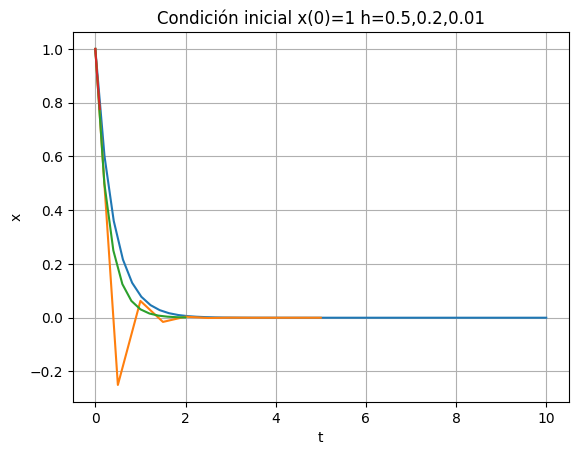

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd5191290>

In [14]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=0.5,0.2,0.01")
grid("on")
plot(t,X1) #Gráfica azul corresponde a la solución exacta
plot(list2,listx2) #Gráfica naranja corresponde a la solución aproximada en h=0.5
plot(list3,listx3) #Gráfica verde corresponde a la solución aproximada en h=0.2
plot(list4,listx4) #Gráfica rojo corresponde a la solución aproximada en h=0.01

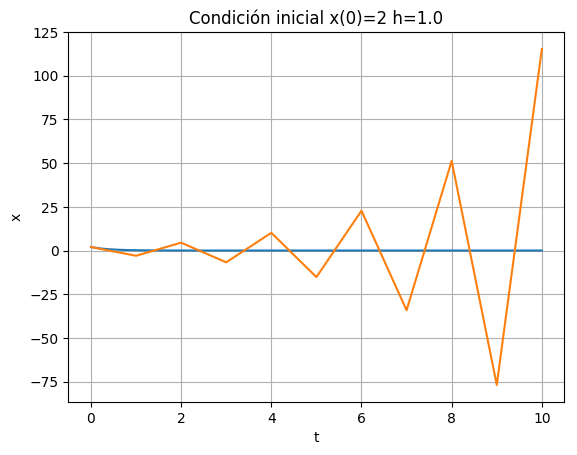

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd50db750>

In [15]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=2 h=1.0")
grid("on")
plot(t,X2) #Gráfica azul corresponde a la solución exacta
plot(list1,listx5) #Gráfica naranja corresponde a la solución aproximada en h=0.1

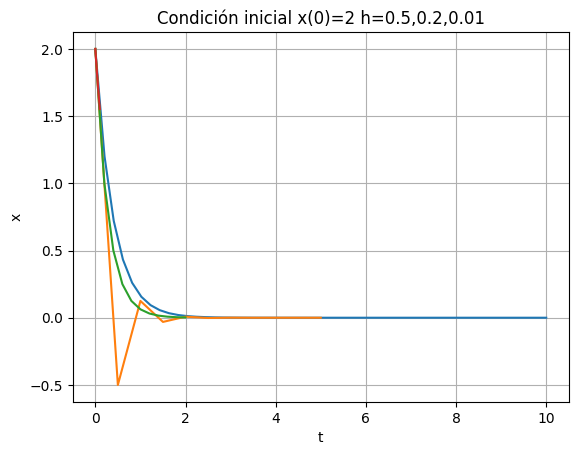

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd5039bd0>

In [16]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=2 h=0.5,0.2,0.01")
grid("on")
plot(t,X2) #Gráfica azul corresponde a la solución exacta
plot(list2,listx6) #Gráfica naranja corresponde a la solución aproximada en h=0.5
plot(list3,listx7) #Gráfica verde corresponde a la solución aproximada en h=0.2
plot(list4,listx8) #Gráfica roja corresponde a la solución aproximada en h=0.01

# Ejercicio 2
¿Qué sistema físico está modelado por $\ddot{x} =-kx$?
Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

La ecuación $\ddot{x} =-kx$ describe el movimiento armónico simple o movimiento libre no amortiguado, y básicamente esta modelando sistemas masa-resorte. Dos condiciones iniciales son $x(0)=x_{0}$, la cantidad de desplazamiento incial, y $x'(0)=x_{1}$, la velocidad inicial de la masa.
La solución general esta dada como:
$$x(t)=c_{1}cos(kt)+c_{2}sin(kt)$$

# Ejercicio 3

Haz $u = \dot{x}(t)$ y calcula la derivada de $u$ ¿qué obtienes y como se relaciona con el sistema original?

Si hacemos $u=\frac{dx}{dt}$ entonces la derivada de $u$ será
$$\frac{du}{dt}=\frac{d^{2}x}{dt^{2}}=-kx$$
De estas dos ecuaciones se obtiene que $u$ corresponde a la velocidad mientras que $\frac{du}{dt}$ es la aceleración y se tiene que las dos ecueciones forman un sistema acoplado de ecuaciones diferenciales, esto es:
$$\frac{dx}{dt}=u$$
$$\frac{du}{dt}=-kx$$
Al resolver estas dos ecuaciones se podrá conocer la solución para la posición $x(t)$ y otra solución para la velocidad $u(t)$. 

# Ejercico 4

Como se explicó en el Ejercicio 3 se puede utilizar el Método de Euler en su forma vectorial, donde cada ecuación del sistema corresponde a una EDO que puede resolverse separadamente con el método.

Como se explicó en el Ejercicio 3 se puede utilizar el Método de Euler en su forma vectorial, donde cada ecuación del sistema corresponde a una EDO que puede resolverse separadamente con el método. De tal forma que cada ecuación fue nombrada con las siguientes funciones:
$$F(x,t)=\frac{dx}{dt}=u$$
$$G(u,t)=\frac{du}{dt}=-kx$$
Se tomó el valor de $k=1$ y el tamaño de $h$ fue de 0.2

In [17]:
function metodo_euler1(F,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + F(x,t)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler1 (generic function with 1 method)

In [18]:
function metodo_euler2(G,list,u0,h)
     u = u0
     listu=[]
     push!(listu,u)
     for i in 2:length(list)
        t = i*h
        u = u + G(u,t)*h
        push!(listu,u) 
     end
     return listu
end

metodo_euler2 (generic function with 1 method)

In [19]:
F(x,t)=-sin(t) #Se propuso una solución para x(t)=cos(t)

F (generic function with 1 method)

In [20]:
G(u,t)=-cos(t)

G (generic function with 1 method)

In [21]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:60
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [22]:
list=lista_t(0,0.2);

In [23]:
vec1=metodo_euler1(F,list,[0,1],0.2);

In [24]:
vec2=metodo_euler2(G,list,[0,0],0.2);

In [25]:
listx=map(x->x[2],vec1);

In [26]:
listu=map(u->u[2],vec2);

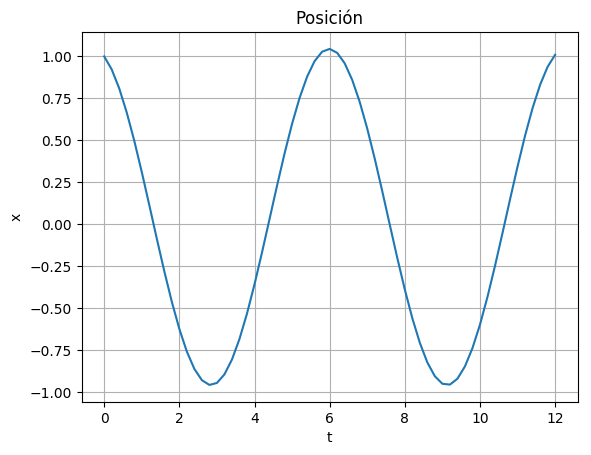

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd4efe850>

In [27]:
xlabel("t")
ylabel("x")
title("Posición")
grid("on")
plot(list,listx) #Gráfica que representa la curva solución aproximada de x(t) por el método de Euler

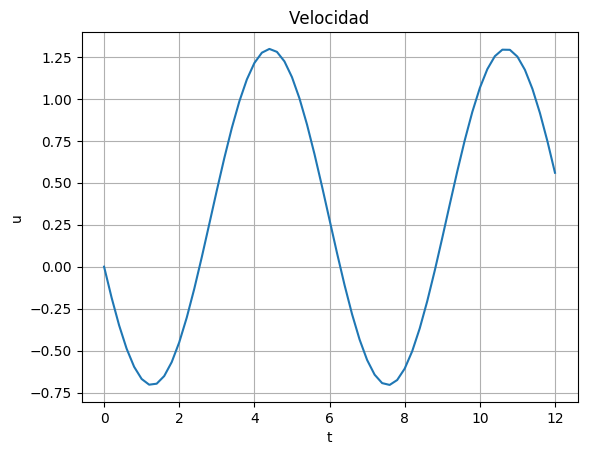

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd4e4be10>

In [28]:
xlabel("t")
ylabel("u")
title("Velocidad")
grid("on")
plot(list,listu) #Gráfica que representa la curva solución aproximada a u(t) por el Método de Euler

# Ejercicio 5
Aplicar el método de Euler para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [29]:
function metodo_euler(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler (generic function with 1 method)

In [30]:
f(x,t)=(2*x[1]-18*t)/(1+t)

f (generic function with 1 method)

In [31]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:10
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [32]:
listt=lista_t(0,1.0);

In [33]:
vecX=metodo_euler(f,listt,[0,1],1.0);

In [34]:
listX=map(x->x[1],vecX) #Se muestran los valores de x correspondientes a la curva aproximada

11-element Array{Real,1}:
    0  
  -12.0
  -31.5
  -58.5
  -93.0
 -135.0
 -184.5
 -241.5
 -306.0
 -378.0
 -457.5

En esta parte se calculan los valores de la solución exacta.

In [35]:
t=linspace(0,10,10) #Se da un intervalo para t

0.0:1.1111111111111112:10.0

In [36]:
#Se calcula la solución exacta
function r(t)
   return 4+8*t-5*t^2 
end;

In [37]:
x=r.(t) #Valores de la solución exacta

10-element Array{Float64,1}:
    4.0    
    6.71605
   -2.91358
  -24.8889 
  -59.2099 
 -105.877  
 -164.889  
 -236.247  
 -319.951  
 -416.0    

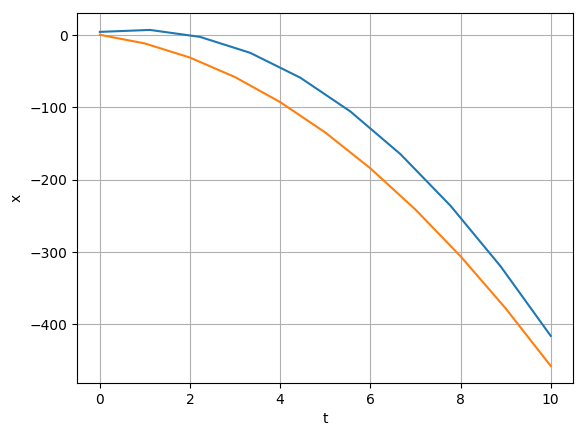

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7febd4c98c10>

In [38]:
xlabel("t")
ylabel("x")
grid("on")
plot(t,x) #Gráfica azul representa la curva solución exacta
plot(listt,listX) #Gráfica naranja representa la curva solución aproximada